In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

In [3]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [4]:
def compute_model_output(x, w, b):
    return w * x + b

In [5]:
def form_plot(w, b):
    # Compute prediction
    tmp_f_wb = compute_model_output(x_train, w, b)
    
    # Plot setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Minimize Cost: Current Cost = {compute_cost(x_train, y_train, w, b):.0f}")
    
    # LEFT PLOT: Housing Prices
    ax1.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')   # Prediction line
    ax1.scatter(x_train, y_train, marker='x', c='r', label='Actual Value')  # Data points
    ax1.set_title("Housing Prices")
    ax1.set_xlabel("Size (1000 sqft)")
    ax1.set_ylabel("Price (in 1000s of dollars)")
    ax1.legend()
    
    # RIGHT PLOT: Cost vs. w (keeping b fixed)
    w_range = np.linspace(0, 400, 100)
    costs = [compute_cost(x_train, y_train, wi, b) for wi in w_range]
    ax2.plot(w_range, costs, c='b')
    ax2.set_title(f"Cost vs. w, (b fixed at {b})")
    ax2.set_xlabel("w")
    ax2.set_ylabel("Cost")
    
    # Highlight chosen w
    ax2.scatter(w, compute_cost(x_train, y_train, w, b), c='r', s=100, label=f"cost at w={w}")
    ax2.legend()
    
    plt.show()

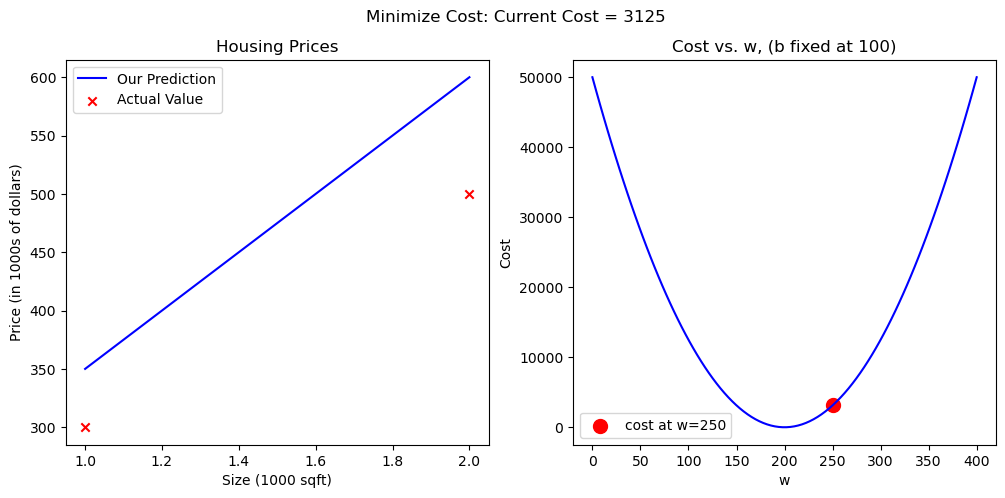

In [6]:
form_plot(w=250, b=100)

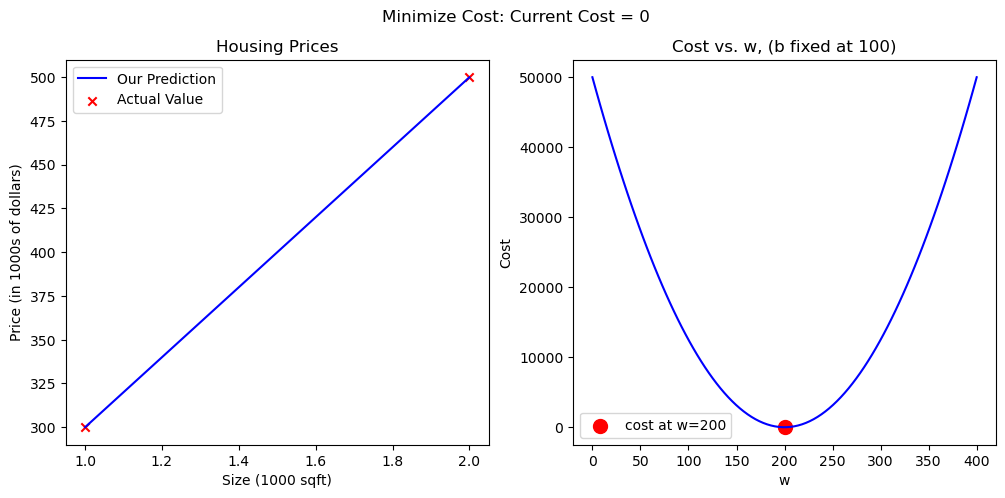

In [7]:
form_plot(w=200, b=100)

In [8]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [9]:
def form_contour_plot(w, b):
    # Predictions
    y_pred = compute_model_output(x_train, w, b)
    cost = compute_cost(x_train, y_train, w, b)
    
    # Plot setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # LEFT PLOT: Housing Prices with error lines
    ax1.plot(x_train, y_pred, c='b', label='Our Prediction')
    ax1.scatter(x_train, y_train, marker='x', c='r', s=100, label='Actual Value')
    
    # Draw error lines
    m = x_train.shape[0]
    squared_errors = []
    for i in range(m):
        ax1.vlines(x_train[i], y_pred[i], y_train[i], color='purple', linestyle='dotted')
        sq_err = (y_pred[i] - y_train[i])**2
        squared_errors.append(sq_err)
        ax1.text(x_train[i] + 0.05, (y_pred[i] + y_train[i]) / 2,
                 f"{int(sq_err)}", color="purple")
    
    # Show cost expression
    error_text = " + ".join(str(int(e)) for e in squared_errors)
    ax1.text(1, 100,
             f"cost = (1/m)*({error_text}) = {int(cost)}",
             color="purple")
    ax1.set_title("Housing Prices")
    ax1.set_xlabel("Size (1000 sqft)")
    ax1.set_ylabel("Price (in 1000s of dollars)")
    ax1.legend()

    # RIGHT PLOT: Contour of Cost(w,b)
    w_vals = np.linspace(0, 500, 100)
    b_vals = np.linspace(-200, 300, 100)
    J_vals = np.zeros((len(w_vals), len(b_vals)))
    
    for i in range(len(w_vals)):
        for j in range(len(b_vals)):
            J_vals[i, j] = compute_cost(x_train, y_train, w_vals[i], b_vals[j])
    
    W, B = np.meshgrid(w_vals, b_vals)
    ax2.contour(W, B, J_vals.T, levels=np.logspace(2, 5, 20), cmap="rainbow")
    ax2.scatter(w, b, c='b', s=100, marker='o')
    ax2.vlines(w, b_vals.min(), b, color='purple', linestyle='dotted')
    ax2.hlines(b, w_vals.min(), w, color='purple', linestyle='dotted')
    
    ax2.set_title("Cost(w,b)")
    ax2.set_xlabel("w")
    ax2.set_ylabel("b")
    
    plt.show()

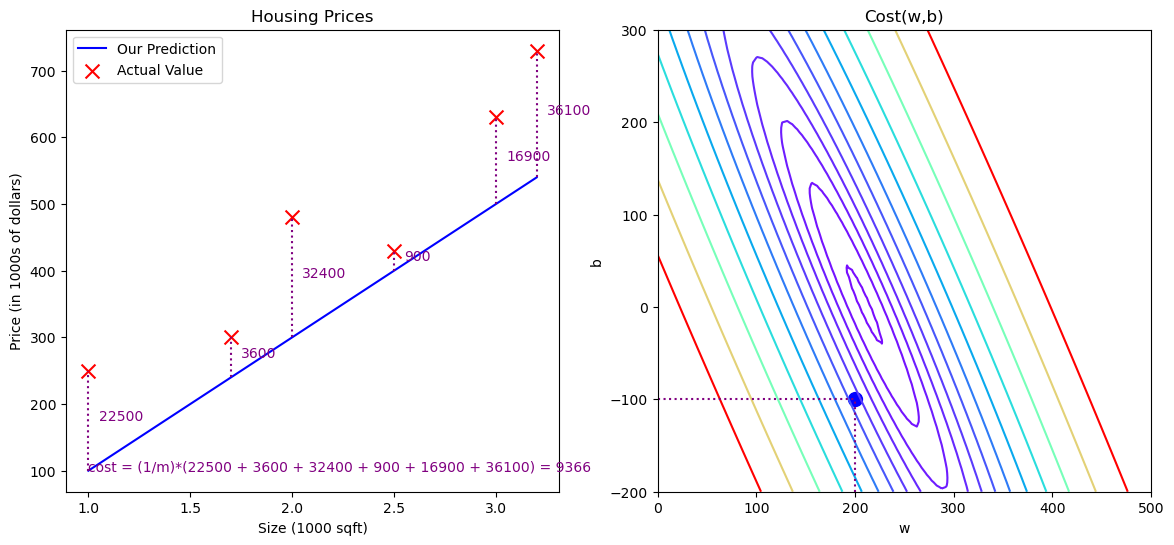

In [10]:
form_contour_plot(w=200, b=-100)

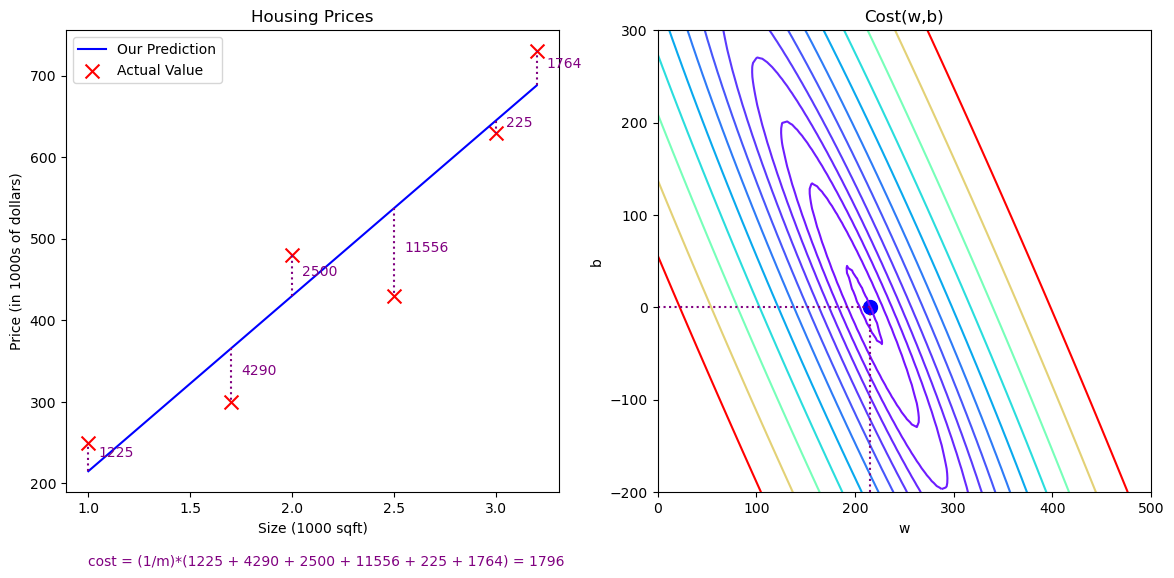

In [11]:
form_contour_plot(w=215, b=0)